In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
appln_data = pd.read_csv('appln_data.csv')
prev_appln_data = pd.read_csv('prev_appln_data.csv')


### APPLICATION DATA

In [3]:
appln_data.describe

<bound method NDFrame.describe of         Unnamed: 0  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
0                0      100002       1         Cash loans           M   
1                1      100003       0         Cash loans           F   
2                2      100004       0    Revolving loans           M   
3                3      100006       0         Cash loans           F   
4                4      100007       0         Cash loans           M   
...            ...         ...     ...                ...         ...   
307506      307506      456251       0         Cash loans           M   
307507      307507      456252       0         Cash loans           F   
307508      307508      456253       0         Cash loans           F   
307509      307509      456254       1         Cash loans           F   
307510      307510      456255       0         Cash loans           F   

       FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0                 

In [4]:
appln_data.dtypes

Unnamed: 0                       int64
SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
REGION_RATING_CLIENT     

#### Lets convert these object type variables to categorical variables | General Rule : N = 0 Y = 1

In [5]:
appln_data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [6]:
appln_data['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [7]:
appln_data['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [8]:
appln_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [9]:
def encoder(df,col_name):
    enc = preprocessing.LabelEncoder()
    df[col_name] = enc.fit_transform(df[col_name])

In [10]:
encoder(appln_data, 'NAME_CONTRACT_TYPE')
encoder(appln_data, 'FLAG_OWN_REALTY')
encoder(appln_data, 'FLAG_OWN_CAR')
encoder(appln_data, 'CODE_GENDER')
encoder(appln_data, 'NAME_CONTRACT_TYPE')
encoder(appln_data, 'NAME_INCOME_TYPE')
encoder(appln_data, 'NAME_EDUCATION_TYPE')
encoder(appln_data, 'NAME_FAMILY_STATUS')
encoder(appln_data, 'NAME_HOUSING_TYPE')
encoder(appln_data, 'WEEKDAY_APPR_PROCESS_START')
encoder(appln_data, 'ORGANIZATION_TYPE')

# Lets check the columns converted to categorical columns.
appln_data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,100002,1,0,1,0,1,0,202500.0,406597.5,...,0,0,0,0,0,0,0,0,0,0
1,1,100003,0,0,0,0,0,0,270000.0,1293502.5,...,0,0,0,0,0,0,0,0,0,0
2,2,100004,0,1,1,1,1,0,67500.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,3,100006,0,0,0,0,1,0,135000.0,312682.5,...,0,0,0,0,0,0,0,0,0,0
4,4,100007,0,0,1,0,1,0,121500.0,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
appln_data.dtypes

Unnamed: 0                       int64
SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE               int64
CODE_GENDER                      int32
FLAG_OWN_CAR                     int32
FLAG_OWN_REALTY                  int32
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
NAME_INCOME_TYPE                 int32
NAME_EDUCATION_TYPE              int32
NAME_FAMILY_STATUS               int32
NAME_HOUSING_TYPE                int32
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
REGION_RATING_CLIENT     

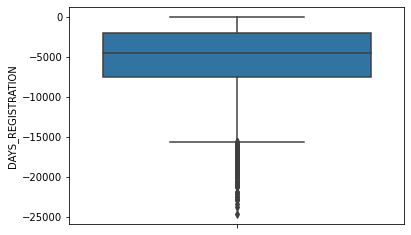

In [12]:
# Check why the data is negative
sns.boxplot(y=appln_data['DAYS_REGISTRATION'])
plt.show()

In [13]:
appln_data['DAYS_REGISTRATION']

0        -3648.0
1        -1186.0
2        -4260.0
3        -9833.0
4        -4311.0
           ...  
307506   -8456.0
307507   -4388.0
307508   -6737.0
307509   -2562.0
307510   -5128.0
Name: DAYS_REGISTRATION, Length: 307511, dtype: float64

appln_data['DAYS_REGISTRATION'] signifies how many days before the application did client change his registration. We can convert this to absolute integer values safely.

In [14]:
appln_data['DAYS_REGISTRATION'] = abs(appln_data['DAYS_REGISTRATION']).astype(int)

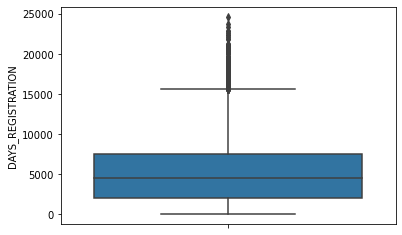

In [15]:
sns.boxplot(y=appln_data['DAYS_REGISTRATION'])
plt.show()

### PREVIOUS APPLICATION DATA

In [16]:
prev_appln_data.describe

<bound method NDFrame.describe of          Unnamed: 0  SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  \
0                 0     2030495      271877     Consumer loans   
1                 1     2802425      108129         Cash loans   
2                 2     2523466      122040         Cash loans   
3                 3     2819243      176158         Cash loans   
4                 4     1784265      202054         Cash loans   
...             ...         ...         ...                ...   
1670209     1670209     2300464      352015     Consumer loans   
1670210     1670210     2357031      334635     Consumer loans   
1670211     1670211     2659632      249544     Consumer loans   
1670212     1670212     2785582      400317         Cash loans   
1670213     1670213     2418762      261212         Cash loans   

         AMT_APPLICATION WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                17145.0                   SATURDAY                       15   
1            

In [17]:
prev_appln_data.dtypes

Unnamed: 0                       int64
SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_APPLICATION                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
NAME_YIELD_GROUP                object
dtype: object

In [18]:
prev_appln_data['FLAG_LAST_APPL_PER_CONTRACT'].value_counts()

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [19]:
prev_appln_data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [20]:
prev_appln_data['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [21]:
prev_appln_data['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [22]:
prev_appln_data['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [23]:
prev_appln_data['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [24]:
prev_appln_data['CODE_REJECT_REASON'].value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [25]:
prev_appln_data['NAME_CLIENT_TYPE'].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [26]:
prev_appln_data['NAME_GOODS_CATEGORY'].value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In [27]:
prev_appln_data['NAME_PORTFOLIO'].value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [28]:
prev_appln_data['NAME_PRODUCT_TYPE'].value_counts()

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

In [29]:
prev_appln_data['CHANNEL_TYPE'].value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [30]:
prev_appln_data['NAME_SELLER_INDUSTRY'].value_counts()

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [31]:
prev_appln_data['NAME_YIELD_GROUP'].value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

In [32]:
encoder(prev_appln_data, 'NAME_SELLER_INDUSTRY')
encoder(prev_appln_data, 'CHANNEL_TYPE')
encoder(prev_appln_data, 'NAME_PRODUCT_TYPE')
encoder(prev_appln_data, 'NAME_PORTFOLIO')
encoder(prev_appln_data, 'NAME_GOODS_CATEGORY')
encoder(prev_appln_data, 'NAME_CLIENT_TYPE')
encoder(prev_appln_data, 'CODE_REJECT_REASON')
encoder(prev_appln_data, 'NAME_PAYMENT_TYPE')
encoder(prev_appln_data, 'NAME_CONTRACT_STATUS')
encoder(prev_appln_data, 'WEEKDAY_APPR_PROCESS_START')
encoder(prev_appln_data, 'NAME_CONTRACT_TYPE')
encoder(prev_appln_data, 'FLAG_LAST_APPL_PER_CONTRACT')
encoder(prev_appln_data, 'NAME_CASH_LOAN_PURPOSE')
encoder(prev_appln_data, 'NAME_YIELD_GROUP')

In [33]:
prev_appln_data.dtypes

Unnamed: 0                       int64
SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE               int32
AMT_APPLICATION                float64
WEEKDAY_APPR_PROCESS_START       int32
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT      int32
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE           int32
NAME_CONTRACT_STATUS             int32
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE                int32
CODE_REJECT_REASON               int32
NAME_CLIENT_TYPE                 int32
NAME_GOODS_CATEGORY              int32
NAME_PORTFOLIO                   int32
NAME_PRODUCT_TYPE                int32
CHANNEL_TYPE                     int32
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY             int32
NAME_YIELD_GROUP                 int32
dtype: object

In [36]:
appln_data.to_csv("appln_data.csv")
prev_appln_data.to_csv("prev_appln_data.csv")